In [1]:
# Annotate values on bars
# Here the data is two customer types and we will follow the perfoermance of five agents during some months
# We want to show percent performance and add number of interactions as extra information

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import calendar


In [3]:
data={'type':np.random.randint(low=0, high=2, size=1000), 
      'month':np.random.randint(low=1, high=5, size=1000),
      'agent':np.random.randint(low=1, high=6, size=1000),
      'percent':np.random.uniform(size=1000),
      'count':np.random.randint(low=20, high=50, size=1000)}

test_data=pd.DataFrame(data)

In [4]:
test_data.head(2)

,type,month,agent,percent,count
0,0,1,3,0.517482,25
1,0,3,4,0.735856,42


In [5]:
# pivot the data to get it on agent level
test_data_pct=pd.pivot_table(test_data, values='percent', index=['type', 'month'],columns=['agent'], aggfunc=np.mean)
test_data_count=pd.pivot_table(test_data, values='count', index=['type', 'month'], columns=['agent'], aggfunc=np.mean)


In [6]:
test_data_pct.head(2)

agent              1         2         3         4         5
type month                                                  
0    1      0.538783  0.478902  0.550291  0.350779  0.554422
     2      0.623896  0.531464  0.608364  0.502182  0.472264

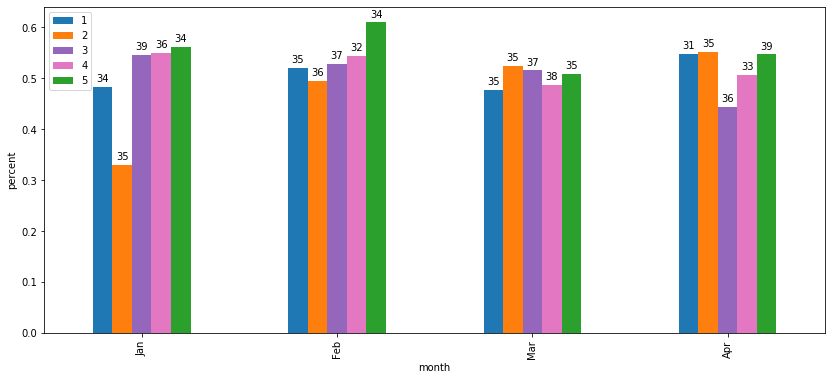

In [7]:
select_type=1

# select which customer type to analyse
df_anno=test_data_count.xs(select_type,level=0)
df_plot=test_data_pct.xs(select_type,level=0)

# plot the percentage for all agents/months
ax=df_plot.plot(kind='bar', color=['C0','C1','C4','C6','C2'], stacked=False, figsize=[14,6])

#df_plot=df_plot.fillna(0)
plt.ylabel('percent')
plt.legend(loc='upper left')

# prepare annotations
# since we have many bars per month we need to use two for loops
xs=df_plot.index
ys=df_plot

for x in xs: # x is the month
    for i,y in enumerate(ys): # y is the height of the bar
        label = "{:.0f}".format(df_anno[y].loc[x]) # df_anno is the annotation we want to use
        plt.annotate(label, # this is the text
                     (x-1.2+i*(1/10),df_plot[y].loc[x]), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(0,5), # distance from text to points (x,y)
                     ha='center', # horizontal alignment can be left, right or center
                     color='black')

ax.set_xticklabels(map(lambda x: calendar.month_abbr[x], df_plot.index));
